# 2x2繰り返しゲーム
## 2025KGSOC数理社会学ノート（5章）
石田淳（aishida@kwansei.ac.jp）

繰り返しゲームをPythonプログラムで再現する．必要なライブラリを読み込んでおく．

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Matplotlib is building the font cache; this may take a moment.


まず最初に利得行列を定義する．

In [2]:
# payoff matrix
R = 3 #CC
S = 0 #CD
T = 5 #DC
P = 1 #DD

戦略をグローバル関数として定義する．自分と相手の履歴を引数にして，自分の履歴に1（協力）を加えるか0（非協力）を加えるかを判定する．

In [3]:
# strategy function as global functions
def TFT(selfhist, otherhist):
    if selfhist == []:
        selfhist.append(1)
    elif otherhist[len(selfhist)-1] == 1:
        selfhist.append(1)
    elif otherhist[len(selfhist)-1] == 0:
        selfhist.append(0)

def TRIGGER(selfhist, otherhist):
    if selfhist == []:
        selfhist.append(1)
    elif len(otherhist) != sum(otherhist):
        selfhist.append(0)
    else:
        selfhist.append(1)

def ALLC(selfhist, otherhist):
    selfhist.append(1)

def ALLD(selfhist, otherhist):
    selfhist.append(0)

def RAND(selfhist, otherhist):
    selfhist.append(random.choice([0,1]))

結果に応じて，利得を割り当てる関数

In [4]:
# payoff allocation function as a global function
def payoff(xhist, yhist, xpayoffhist, ypayoffhist):
    x = xhist[len(xhist)-1]
    y = yhist[len(yhist)-1]
    if x == 1 and y == 1:
        xpayoffhist.append(R)
        ypayoffhist.append(R)
    elif x == 1 and y == 0:
        xpayoffhist.append(S)
        ypayoffhist.append(T)
    elif x == 0 and y == 1:
        xpayoffhist.append(T)
        ypayoffhist.append(S)
    elif x == 0 and y == 0:
        xpayoffhist.append(P)
        ypayoffhist.append(P)

プレイヤーのクラスを定義．クラスとはオブジェクトとオブジェクトのメソッドを定める命令である．
プレイヤークラスは初期値として戦略を渡され，相手の履歴を受け取って自らの戦略と履歴に応じて反応する関数を持つ．

In [ ]:
# player class
class player:
    def __init__(self, strategy):
        self.gamehist = []
        self.payoffhist = []
        self.strategy = strategy

    def response(self, otherhist):
        self.strategy(self.gamehist, otherhist)

プレイヤークラスのインスタンスを作成する．インスタンスとは実際に動かすクラスオブジェクトである．

In [6]:
# creating instances of a player class
P1 = player(TFT)
P2 = player(RAND)

100回対戦する．それぞれのプレイヤーが相手の履歴を受け取り戦略に応じて反応する．その後結果に応じて利得を配分する．これを`for`文で繰り返す．

In [7]:
times = 100
for t in range(times):
    P1.response(P2.gamehist)
    P2.response(P1.gamehist)
    payoff(P1.gamehist, P2.gamehist, P1.payoffhist, P2.payoffhist)

In [8]:
print("--------- for P1 ---------")
print("corpration rate = ", sum(P1.gamehist) / len(P1.gamehist))
print("sum of payoff = ", sum(P1.payoffhist))
print("--------- for P2 ---------")
print("corpration rate = ", sum(P2.gamehist) / len(P2.gamehist))
print("sum of payoff = ", sum(P2.payoffhist))

--------- for P1 ---------
corpration rate =  0.43
sum of payoff =  216
--------- for P2 ---------
corpration rate =  0.43
sum of payoff =  216


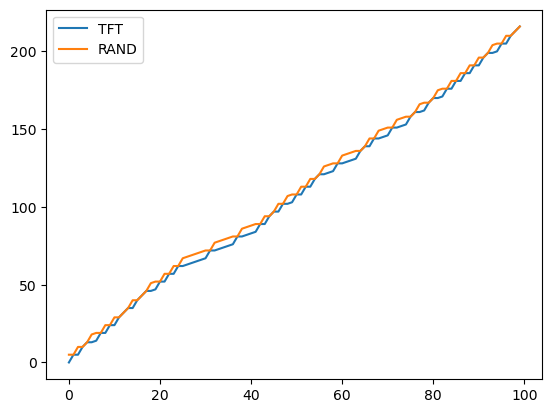

In [9]:
# cumulative summation of payoff (need numpy)
plt.plot(np.array(P1.payoffhist).cumsum(), label=str(P1.strategy.__name__))
plt.plot(np.array(P2.payoffhist).cumsum(), label=str(P2.strategy.__name__))
plt.legend();

いろいろ対戦してみよう．また，自分で戦略を組んで試してみよう．